In [16]:
from sklearn.datasets import load_breast_cancer 

from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import roc_curve , auc , accuracy_score, precision_score, recall_score, f1_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV #하이퍼 파리미터 튜닝 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris


import seaborn as sns 
import matplotlib.pyplot as plt
import mglearn
import numpy as np 
import pandas as pd 
%matplotlib inline 

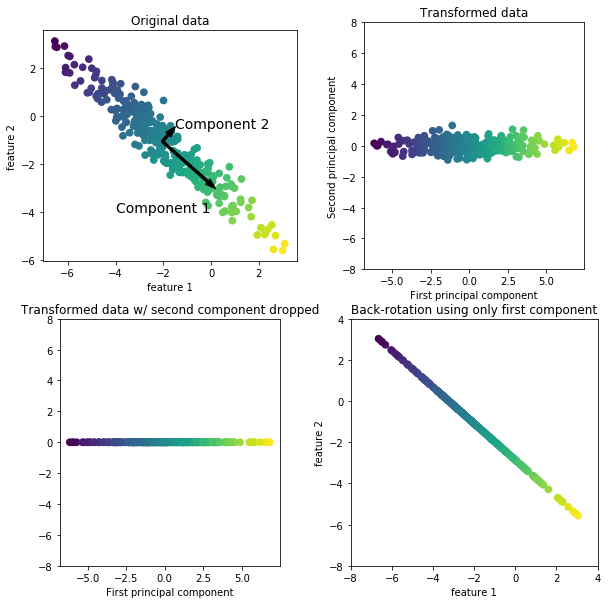

In [17]:
mglearn.plots.plot_pca_illustration()
plt.show()

In [18]:
iris = load_iris()
iris_df = pd.DataFrame(data = np.c_[iris['data'],iris['target']],
                   columns = iris['feature_names']+['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [19]:
iris_df['target'] = iris_df['target'].map({0:'setosa',
                                          1:'versicolor',
                                          2:'virginica'})

X= iris_df.iloc[:,:-1]
y= iris_df.iloc[:,[-1]]
x.head() , y.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
    target
 0  setosa
 1  setosa
 2  setosa
 3  setosa
 4  setosa)

In [20]:
y2 = pd.DataFrame({'target':iris.target})
y2.head()

,target
0,0
1,0
2,0
3,0
4,0


In [21]:
# iris data 중 Sepal 과 petal 데이터를 X , target 을 y로 설정하여 X 에대해 Y를 구분할수 있는지 확인하려한다
# 이때 PCA는 데이터셋의 평균이 0이라고 가정하기 때문에 데이터를 원점을 기준으로 분포하도록 전처리 과정이 필요하다 


In [24]:
X_centered = X - X.mean(axis =0)

In [25]:
U,S, V_T = np.linalg.svd(X_centered)
V = V_T.T[:,:]
V

array([[ 0.36138659, -0.65658877,  0.58202985,  0.31548719],
       [-0.08452251, -0.73016143, -0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266, -0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102, -0.54583143,  0.75365743]])

In [26]:
#특성(변수)가 총 4개 차원4개 주성분4개 


#d차원으로 투영
추출한 주성분들에 대해 각 차원으로 데이터를 X를 투영하여 차원축소를 수행할 수 있다. 
투영은 데이터를 특정 축에 선형변환 

$(Z=X \centerdot V_d)$

In [28]:
Z = X_centered.dot(V)

In [29]:
Z['target'] = y2.target

In [31]:
Z.columns = ['PC1','PC2','PC3','PC4','target']
Z.head()
#PCA(principal Component Analysis):
#변수간의 상관관계가 있는 다 차원의 데이터를 효율적으로 저 차원의 데이터로 
#요약하는 방법 



,PC1,PC2,PC3,PC4,target
0,-2.684126,-0.319397,0.027915,0.002262,0
1,-2.714142,0.177001,0.210464,0.099027,0
2,-2.888991,0.144949,-0.017900,0.019968,0
3,-2.745343,0.318299,-0.031559,-0.075576,0
4,-2.728717,-0.326755,-0.090079,-0.061259,0


In [ ]:
import seaborn as sns

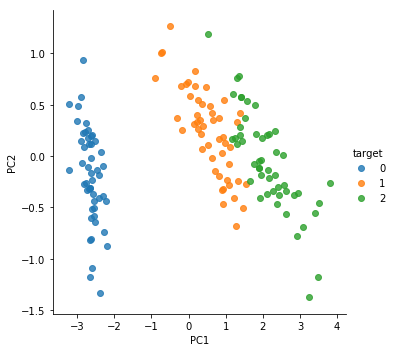

In [33]:
sns.lmplot('PC1','PC2', data = Z , fit_reg = False , hue = 'target')

In [34]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA

In [35]:
np.random.seed(999)

In [38]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [39]:
pca = PCA(n_components=4)
#n_components =4  : 투영할 차원 수 , 0.0 ~ 1.0 사이로 값을 설정시 해당 
#분산의 비율이 필요한 차원수로 설정됨 

In [40]:
Z = pca.fit_transform(X)
Z

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

In [41]:
pca.components_ #주성분을 확인할수 있음

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [44]:
pca.explained_variance_ #공분산 행렬의 고유값 

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [43]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [48]:
#1차 항복이 1차 주성분 축에 데이터셋 분산의 92%가 놓여있고 주성분 축으로 갈수록 데이터분포모양이 줄어듬을 
# 알 수 있다

In [49]:
from mpl_toolkits.mplot3d import Axes3D

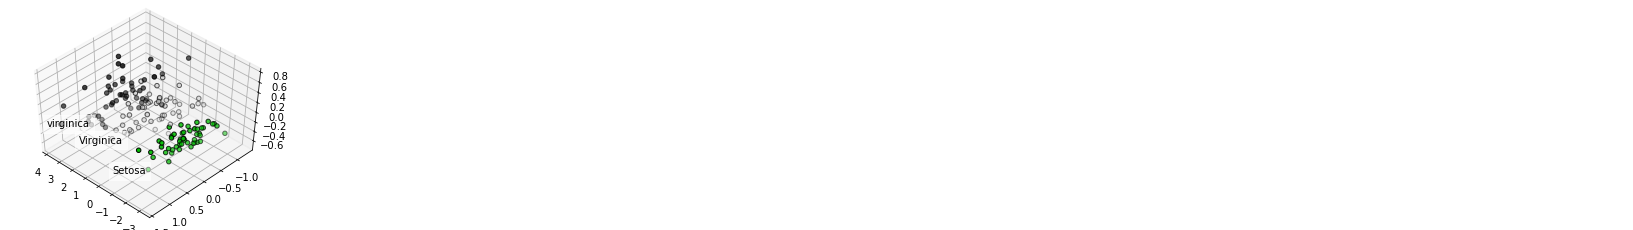

In [60]:


iris = datasets.load_iris()
X = iris.data
y = iris.target 

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
centers = [[1,1],[-1,-1],[1,-1]]

fig = plt.figure(1, figsize=(4,3))
ax = Axes3D(fig, rect =[0,0,.95,1], elev = 48 , azim =134)

for name , label in[('Setosa',0),('Virginica',1),('virginica',2)]:
    ax.text3D(X[y==label,0].mean(),
             X[y==label,1].mean()+1.5,
            X[y==label,2].mean(),name,horizontalalignment='center',
             bbox=dict(alpha=0.5, edgecolor='w',facecolor='w'))

y = np.choose(y,[1,2,0]).astype(np.float)
ax.scatter(X[:,0],X[:,1],X[:,2], c=y ,
           cmap = plt.cm.nipy_spectral , edgecolor='k')


In [65]:
iris = datasets.load_iris()
X = iris.data
y = iris.target 

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)


# centers = [[1,1],[-1,-1],[1,-1]]

# fig = plt.figure(1, figsize=(4,3))
# ax = Axes3D(fig, rect =[0,0,.95,1], elev = 48 , azim =134)

# for name , label in[('Setosa',0),('Virginica',1),('virginica',2)]:
#     ax.text3D(X[y==label,0].mean(),
#              X[y==label,1].mean()+1.5,
#             X[y==label,2].mean(),name,horizontalalignment='center',
#              bbox=dict(alpha=0.5, edgecolor='w',facecolor='w'))

# y = np.choose(y,[1,2,0]).astype(np.float)

         

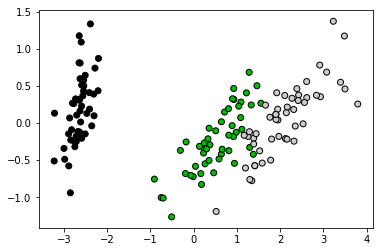

In [66]:
plt.scatter(X[:,0],X[:,1], c=y ,cmap = plt.cm.nipy_spectral , edgecolor='k')
plt.show()

In [ ]:
# PCA 는 기존 데이터 백터를 선형변환하여 Projection 하는 것이므로 , 비선형 데이터분포에 대해 적합하지 않다

# 또한 PCA는 데이터의 분포가 가장 크게 되는 백터를 찾는 것인데, 분포가 가장 커지는 벡터가 
# 우리가 찾는 데이터의 특성을 
# 항상 잘 표현한다고 할 수 없으며 , 해당 축에 대한 의미를 분석하는것도 어렵다.



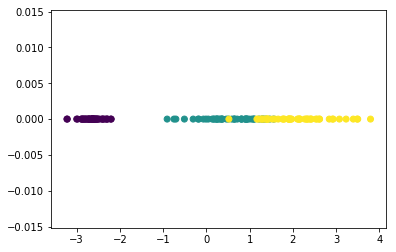

In [70]:
iris = datasets.load_iris()
X = iris.data
y = iris.target 

pca = decomposition.PCA(n_components=1)
pca.fit(X)
X = pca.transform(X)
X

zeros = np.zeros(150)

plt.scatter(X[:,0], zeros , c = y)
plt.show()

In [71]:
cancer = datasets.load_breast_cancer()

In [78]:
cancer.keys() ,cancer.target_names,cancer.feature_names

(dict_keys(['feature_names', 'filename', 'target_names', 'data', 'target', 'DESCR']),
 array(['malignant', 'benign'], dtype='<U9'),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

In [79]:
y = cancer.target # 걸렷다 안걸렷다 0,1 로나눔 

In [74]:
X = cancer.data
y = cancer.target

pca = PCA(n_components=5)
#분산의 비율로 선정
Z = pca.fit_transform(X)
Z



array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01,
        -8.71197531e+00,  3.20004861e+01],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01,
         1.78612832e+01, -4.33487404e+00],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00,
         4.19934010e+00, -4.66529118e-01],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01,
        -9.77188104e+00, -6.15621283e+00],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01,
        -2.36608814e+01,  3.56513324e+00],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01,
         2.54724855e+00, -1.47175663e+01]])

In [81]:
pca.explained_variance_ratio_

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05])

In [82]:
pca.explained_variance_

array([4.43782605e+05, 7.31010006e+03, 7.03833742e+02, 5.46487379e+01,
       3.98900178e+01])

In [83]:
pca.n_features_

30

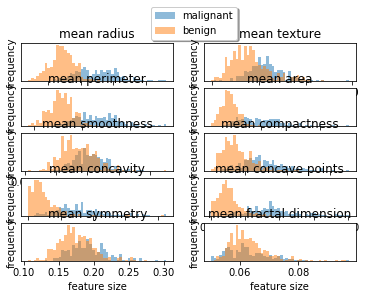

In [91]:
fig, axes = plt.subplots(5, 2)
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
target_set = np.array([malignant, benign])

for i, ax in zip(np.arange(10), axes.ravel()):
    for t in target_set:
        _, bins = np.histogram(cancer.data[:, i], bins=50)
        # bins: histogram 간격
        ax.hist(t[:, i], bins=bins, alpha=0.5)
        ax.set_title(cancer.feature_names[i])
        ax.set_yticks(()) 
        ax.set_xlabel('feature size') 
        ax.set_ylabel('frequency')
axes[0, 0].legend(['malignant', 'benign'], loc=(0.85, 1.1), 
                  bbox_to_anchor=(0.85, 1.1), fancybox=True, shadow=True)

plt.show()

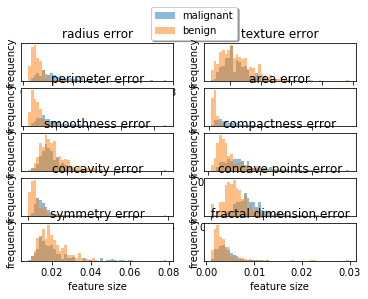

In [94]:
fig, axes = plt.subplots(5, 2)
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
target_set = np.array([malignant, benign])

for i, ax in zip(np.arange(10,20), axes.ravel()):
    for t in target_set:
        _, bins = np.histogram(cancer.data[:, i], bins=50)
        # bins: histogram 간격
        ax.hist(t[:, i], bins=bins, alpha=0.5)
        ax.set_title(cancer.feature_names[i])
        ax.set_yticks(()) 
        ax.set_xlabel('feature size') 
        ax.set_ylabel('frequency')
axes[0, 0].legend(['malignant', 'benign'], loc=(0.85, 1.1), 
                  bbox_to_anchor=(0.85, 1.1), fancybox=True, shadow=True)

plt.show()

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(cancer.data)

X_scaled = scaler.transform(cancer.data)

In [100]:
#기본값일때 PCA 는 데이터를 회전과 이동만 시키고 모든 주성분을 유지합니다.
#데이터의 차원을 줄이려면 PCA 객체를 만들때 얼마나 많은 성분을 유지할지 알려줘야한다.

from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)


X_scaled_shape = X_scaled.shape
print('{}'.format(X_scaled_shape))


(569, 30)


In [101]:
X_pca_shape = X_pca.shape 
print('{}'.format(X_pca_shape))

(569, 2)


In [102]:
targets = np.unique(cancer.target)
markers = ['^','o']

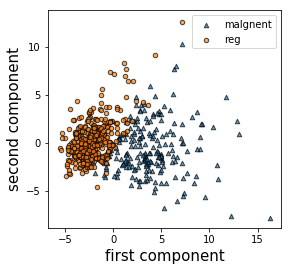

In [107]:
for target , marker in zip(targets,markers):
    plt.scatter(X_pca[cancer.target==target][:,0],X_pca[cancer.target==target][:,1],
    s=20 ,alpha = 0.7 , marker = marker , edgecolors = 'k')
    
plt.legend(['malgnent','reg'],loc=1)
plt.gca().set_aspect('equal') # x축과 y축의 길이를 같게 한다 
plt.xlabel('first component',size = 15)
plt.ylabel('second component', size = 15)
plt.show()
    

In [108]:
pca.get_params

<bound method BaseEstimator.get_params of PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)>